# Homework5
## 2020062324 이은비

In [16]:
import torch
import torchvision
import numpy as np

## Data loading

In [17]:
from torchvision import datasets
from torchvision import transforms

In [18]:
batch_size = 12

train_data = datasets.MNIST('./data/', train = True, download = True, transform = transforms.ToTensor())
test_data = datasets.MNIST('./data/', train = False, download = True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

## Model

In [19]:
from torch import nn

### MLP with hyper parameters (ModuleList)

In [20]:
class MLP_h(nn.Module):
    def __init__(self, hidden_units = [512, 256, 128, 64]) :
        super(MLP_h, self).__init__()
        
        self.in_dim = 28*28 # MNIST
        self.out_dim = 10
        
        self.hidden_units = [self.in_dim] + hidden_units + [self.out_dim]
        # fc1~5 : (in_dim, 512), (512, 256), (256, 128), (128, 64), (64, out_dim)
        self.l_layers = nn.ModuleList([nn.Linear(self.hidden_units[i], self.hidden_units[i+1]) for i in range(len(self.hidden_units)-1)])
        #
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
        
    def forward(self, x):
        a = x.view(-1, self.in_dim)
        
        for i, l in enumerate(self.l_layers):
            z = l(a)
            if i == len(self.l_layers) - 1:
                logit = a
            else:
                a = self.relu(z)
                
        return logit

## Train & Test

In [21]:
from torch import optim

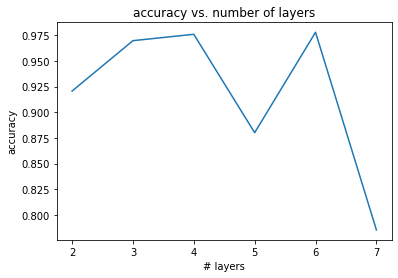

[tensor(0.9206), tensor(0.9697), tensor(0.9759), tensor(0.8801), tensor(0.9779), tensor(0.7854)]


In [24]:
import matplotlib.pyplot as plt

n_of_layers = [[512], # 2 layers
              [512, 256], # 3 layers
              [512, 256, 128], # 4 layers
              [512, 256, 128, 64],  # 5 layers
              [512, 256, 128, 64, 32],  # 6 layers
              [512, 256, 128, 64, 32, 16]  # 7 layers
              ]

accuracy = []
# 레이어 2, 3, 4, 5...개를 가지는 모델을 만들어 반복
for layers_ in n_of_layers:
    # 모델 생성
    model = MLP_h(layers_)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 0.01)
    
    # Training
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
    # Accurancy 측정
    n_predict = 0
    n_correct = 0

    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()

    # 그래프를 그리기 위해 추가
    accuracy.append(n_correct/n_predict)
            
plt.plot([2, 3, 4, 5, 6, 7], accuracy)
plt.title('accuracy vs. number of layers')
plt.ylabel('accuracy')
plt.xlabel('# layers')
plt.show()

print(accuracy)